In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy import signal
import os

In [2]:
os.chdir('/home/jiarong/research/turbulence/noforcing')
field = pd.read_table('./field0.125', delimiter = ' ')

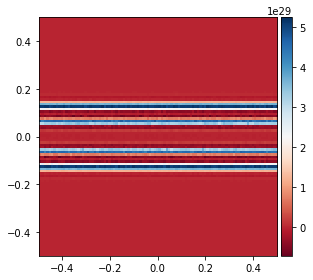

In [3]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def colorbar(mappable):
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    return fig.colorbar(mappable, cax=cax)
from scipy.interpolate import griddata
points = np.array([field.x, field.y])
grid_x, grid_y = np.mgrid[-0.5:0.5:100j, -0.5:0.5:100j]
grid_omega = griddata((field.x, field.y), field['omega'], (grid_x, grid_y), method='cubic')
# img1 = plt.imshow(grid_omega.T, extent=(-0.5,0.5,-0.5,0.5), vmin=0, vmax=5, cmap='RdBu', origin='lower')
img1 = plt.imshow(grid_omega.T, extent=(-0.5,0.5,-0.5,0.5), cmap='RdBu', origin='lower')
colorbar(img1)
plt.tight_layout(h_pad=1)

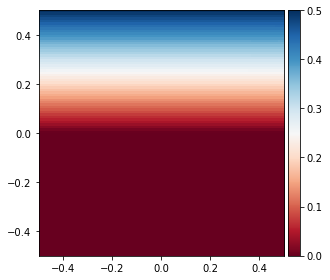

In [4]:
grid_ux = griddata((field.x, field.y), field['u.x'], (grid_x, grid_y), method='cubic')
# img1 = plt.imshow(grid_omega.T, extent=(-0.5,0.5,-0.5,0.5), vmin=0, vmax=5, cmap='RdBu', origin='lower')
img1 = plt.imshow(grid_ux.T, extent=(-0.5,0.5,-0.5,0.5), cmap='RdBu', origin='lower')
colorbar(img1)
plt.tight_layout(h_pad=1)

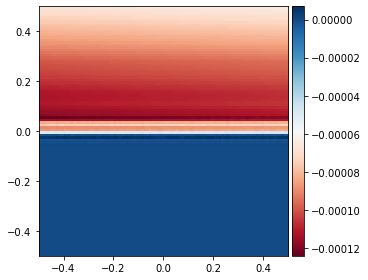

In [5]:
grid_uy = griddata((field.x, field.y), field['u.y'], (grid_x, grid_y), method='cubic')
# img1 = plt.imshow(grid_omega.T, extent=(-0.5,0.5,-0.5,0.5), vmin=0, vmax=5, cmap='RdBu', origin='lower')
img1 = plt.imshow(grid_uy.T, extent=(-0.5,0.5,-0.5,0.5), cmap='RdBu', origin='lower')
colorbar(img1)
plt.tight_layout(h_pad=1)

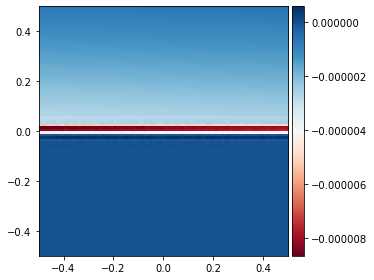

In [6]:
grid_uz = griddata((field.x, field.y), field['u.z'], (grid_x, grid_y), method='cubic')
# img1 = plt.imshow(grid_omega.T, extent=(-0.5,0.5,-0.5,0.5), vmin=0, vmax=5, cmap='RdBu', origin='lower')
img1 = plt.imshow(grid_uz.T, extent=(-0.5,0.5,-0.5,0.5), cmap='RdBu', origin='lower')
colorbar(img1)
plt.tight_layout(h_pad=1)

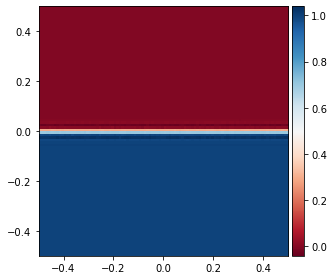

In [7]:
grid_f = griddata((field.x, field.y), field['f'], (grid_x, grid_y), method='cubic')
# img1 = plt.imshow(grid_omega.T, extent=(-0.5,0.5,-0.5,0.5), vmin=0, vmax=5, cmap='RdBu', origin='lower')
img1 = plt.imshow(grid_f.T, extent=(-0.5,0.5,-0.5,0.5), cmap='RdBu', origin='lower')
colorbar(img1)
plt.tight_layout(h_pad=1)

Adding the forcing term:

In [20]:
os.chdir('/home/jiarong/research/turbulence')
stats = pd.read_table('./preliminary/stats2.dat', delimiter = ' ', error_bad_lines=False)
stats.drop(stats.tail(1).index,inplace=True)

b'Skipping line 174231: expected 4 fields, saw 5\n'


Text(0, 0.5, 'Energy')

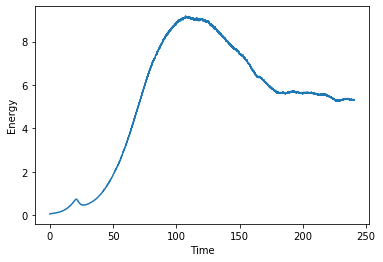

In [21]:
plt.plot(stats.t, stats.energy)
plt.xlabel('Time')
plt.ylabel('Energy')

Text(0, 0.5, 'Dissipation')

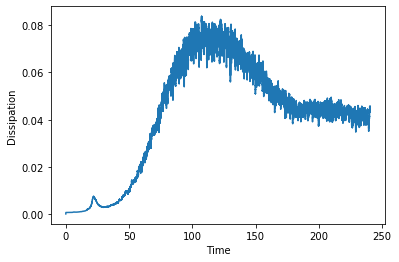

In [22]:
plt.plot(stats.t, stats.dissipation)
plt.xlabel('Time')
plt.ylabel('Dissipation')

Text(0, 0.5, 'Reynolds')

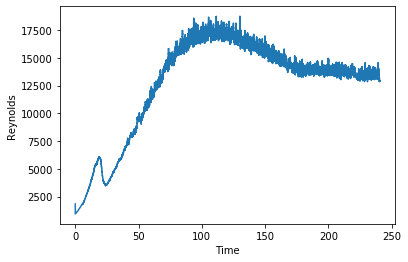

In [23]:
plt.plot(stats.t, stats.Reynolds)
plt.xlabel('Time')
plt.ylabel('Reynolds')

In [6]:
stats

,t,dissipation,energy,Reynolds
0,0.000000,0.000212,0.052002,1843.420
1,0.004692,0.000412,0.052045,1323.520
2,0.013897,0.000812,0.052118,944.269
3,0.024636,0.000812,0.052207,945.845
4,0.035375,0.000812,0.052291,947.340
5,0.049694,0.000812,0.052399,949.291
6,0.064013,0.000813,0.052513,951.344
7,0.078332,0.000813,0.052619,953.251
8,0.093999,0.000813,0.052735,955.329
9,0.109665,0.000813,0.052849,957.401
